In [1]:
import matplotlib.pyplot as plt
import os, re, pickle
import scipy.io
import numpy as np
from collections import defaultdict

import pandas as pd

In [2]:
layers = [
    'backbone.res2.0.conv1',
'backbone.res2.0.conv2',
'backbone.res2.0.conv3',
'backbone.res2.1.conv1',
'backbone.res2.1.conv2',
'backbone.res2.1.conv3',
'backbone.res2.2.conv1',
'backbone.res2.2.conv2',
'backbone.res2.2.conv3',
'backbone.res3.0.conv1',
'backbone.res3.0.conv2',
'backbone.res3.0.conv3',
'backbone.res3.1.conv1',
'backbone.res3.1.conv2',
'backbone.res3.1.conv3',
'backbone.res3.2.conv1',
'backbone.res3.2.conv2',
'backbone.res3.2.conv3',
'backbone.res3.3.conv1',
'backbone.res3.3.conv2',
'backbone.res3.3.conv3',
'backbone.res4.0.conv1',
'backbone.res4.0.conv2',
'backbone.res4.0.conv3',
'backbone.res4.1.conv1',
'backbone.res4.1.conv2',
'backbone.res4.1.conv3',
'backbone.res4.2.conv1',
'backbone.res4.2.conv2',
'backbone.res4.2.conv3',
'backbone.res4.3.conv1',
'backbone.res4.3.conv2',
'backbone.res4.3.conv3',
'backbone.res4.4.conv1',
'backbone.res4.4.conv2',
'backbone.res4.4.conv3',
'backbone.res4.5.conv1',
'backbone.res4.5.conv2',
'backbone.res4.5.conv3',
'roi_heads.pooler.level_poolers.0',
'roi_heads.res5.0.conv1',
'roi_heads.res5.0.conv2',
'roi_heads.res5.0.conv3',
'roi_heads.res5.1.conv1',
'roi_heads.res5.1.conv2',
'roi_heads.res5.1.conv3',
'roi_heads.res5.2.conv1',
'roi_heads.res5.2.conv2',
'roi_heads.res5.2.conv3',
]

## Valid Area = BBoxes Total
normalized by the first step (confidence on the intact image)

In [6]:
sigma_factors = ['bilinear',2,4]
xai_methods = ['fullgradcamraw','odam']

dAUC = {}
iAUC = {}

for xai_method in xai_methods:

    dAUC[xai_method] = defaultdict(defaultdict)
    iAUC[xai_method] = defaultdict(defaultdict)

    for sigma_factor in sigma_factors:
        if sigma_factor == 'bilinear':
            root = f"/mnt/h/jinhan/results/mscoco/xai_saliency_maps_faster_{sigma_factor}/test_faithfulness/{xai_method}"
        else:
            root = f"/mnt/h/jinhan/results/mscoco/xai_saliency_maps_faster_gaussian_sigma{sigma_factor}/test_faithfulness/{xai_method}"

        for layer in layers:
            path = os.path.join(root,f"{layer}.mat")
            mat = scipy.io.loadmat(path)
            intact_score = mat['meanConf_deletionAI'][0,:]
            dAUC[xai_method][sigma_factor][layer] = (mat['meanConf_deletionAI'].mean(axis=0) / intact_score).mean()
            iAUC[xai_method][sigma_factor][layer] = (mat['meanConf_insertationAI'].mean(axis=0)  / intact_score).mean()

not normalized by the first step

In [27]:
sigma_factors = ['bilinear',2,4]
xai_methods = ['fullgradcamraw','odam']

unnorm_dAUC = {}
unnorm_iAUC = {}

for xai_method in xai_methods:

    unnorm_dAUC[xai_method] = defaultdict(defaultdict)
    unnorm_iAUC[xai_method] = defaultdict(defaultdict)

    for sigma_factor in sigma_factors:
        if sigma_factor == 'bilinear':
            root = f"/mnt/h/jinhan/results/mscoco/xai_saliency_maps_faster_{sigma_factor}/test_faithfulness/{xai_method}"
        else:
            root = f"/mnt/h/jinhan/results/mscoco/xai_saliency_maps_faster_gaussian_sigma{sigma_factor}/test_faithfulness/{xai_method}"

        for layer in layers:
            path = os.path.join(root,f"{layer}.mat")
            mat = scipy.io.loadmat(path)
            intact_score = mat['meanConf_deletionAI'][0,:]
            print(intact_score) # for these 3 images the confidence score on the intact image is near 1
            unnorm_dAUC[xai_method][sigma_factor][layer] = (mat['meanConf_deletionAI'].mean(axis=0)).mean()
            unnorm_iAUC[xai_method][sigma_factor][layer] = (mat['meanConf_insertationAI'].mean(axis=0) ).mean()

[0.99822599 0.99825615 0.99299708]
[0.99822599 0.99825615 0.99299708]
[0.99822599 0.99825639 0.99299708]
[0.99822634 0.99825639 0.99299708]
[0.99822599 0.99825639 0.99299708]
[0.99822599 0.99825639 0.99299708]
[0.99822599 0.99825639 0.99299708]
[0.99822599 0.99825639 0.99299708]
[0.99822599 0.99825615 0.99299708]
[0.99822599 0.99825639 0.99299708]
[0.99822599 0.99825639 0.99299708]
[0.99822599 0.99825639 0.99299708]
[0.99822599 0.99825639 0.99299708]
[0.99822599 0.99825639 0.99299708]
[0.99822599 0.99825639 0.99299425]
[0.99822599 0.99825639 0.99299708]
[0.99822599 0.99825639 0.99299708]
[0.99822599 0.99825639 0.99299708]
[0.99822599 0.99825615 0.99299708]
[0.99822599 0.99825615 0.99299708]
[0.99822599 0.99825639 0.99299708]
[0.99822599 0.99825639 0.99299708]
[0.99822599 0.99825639 0.99299708]
[0.99822599 0.99825639 0.99299708]
[0.99822599 0.99825639 0.99299708]
[0.99822599 0.99825639 0.99299708]
[0.99822599 0.99825615 0.99299425]
[0.99822599 0.99825639 0.99299708]
[0.99822599 0.998256

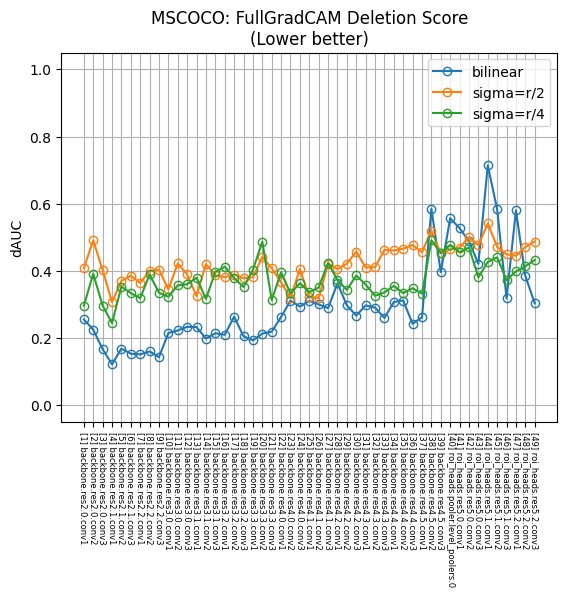

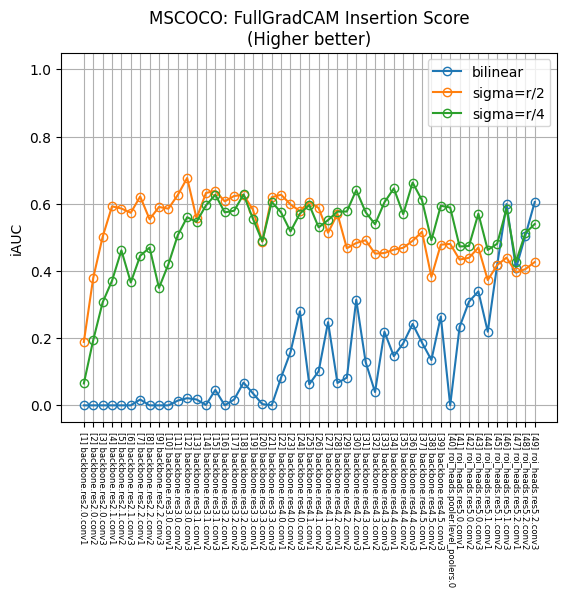

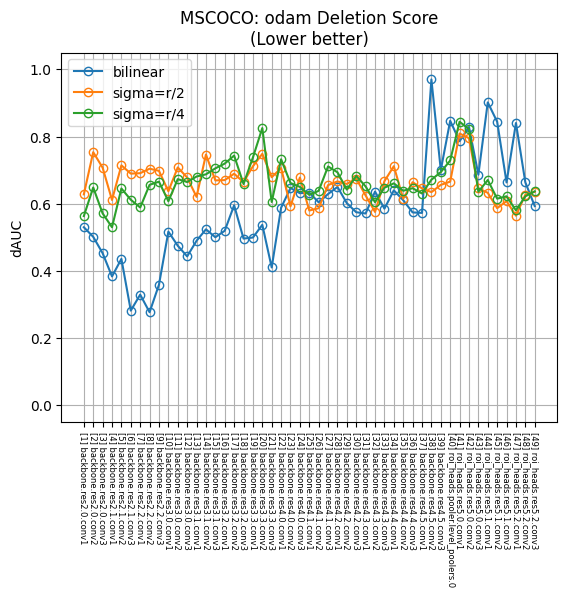

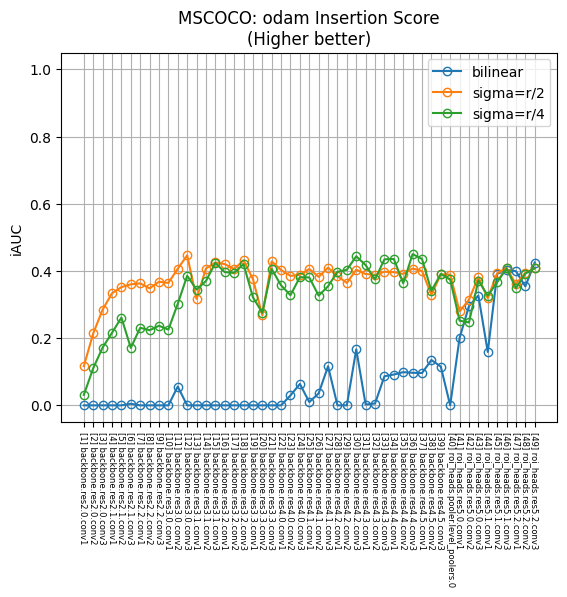

In [7]:
color_codes = {
    'bilinear' : "tab:blue",
    2 : "tab:orange",
    4 : "tab:green",
}

for xai_method in xai_methods:

    plt.figure()
    plt.grid()
    for sigma_factor in sigma_factors:
        legend = sigma_factor
        if sigma_factor != 'bilinear':
            legend = f"sigma=r/{sigma_factor}"
        plt.plot(range(len(layers)), dAUC[xai_method][sigma_factor].values(),color=color_codes[sigma_factor],marker='o',fillstyle='none',label=legend)
    plt.xticks(range(len(layers)), [f"[{i+1}] {name}" for i, name in enumerate(dAUC[xai_method][sigma_factor].keys())],rotation=-90, fontsize=6)
    plt.title(f"MSCOCO: {xai_method.replace('fullgradcamraw','FullGradCAM')} Deletion Score\n(Lower better)")
    plt.ylim([-0.05,1.05])
    plt.ylabel("dAUC")
    plt.legend()
    plt.show()

    plt.figure()
    plt.grid()
    for sigma_factor in sigma_factors:
        legend = sigma_factor
        if sigma_factor != 'bilinear':
            legend = f"sigma=r/{sigma_factor}"
        plt.plot(range(len(layers)), iAUC[xai_method][sigma_factor].values(),color=color_codes[sigma_factor],marker='o',fillstyle='none',label=legend)
    plt.xticks(range(len(layers)), [f"[{i+1}] {name}" for i, name in enumerate(iAUC[xai_method][sigma_factor].keys())],rotation=-90, fontsize=6)
    plt.title(f"MSCOCO: {xai_method.replace('fullgradcamraw','FullGradCAM')} Insertion Score\n(Higher better)")
    plt.ylim([-0.05,1.05])
    plt.ylabel("iAUC")
    plt.legend()
    plt.show()

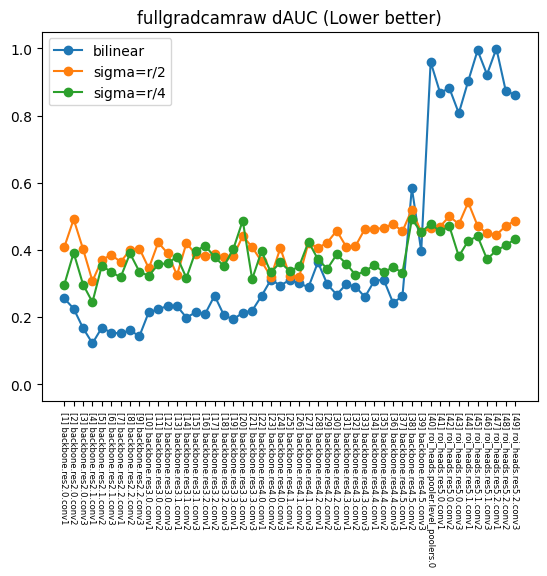

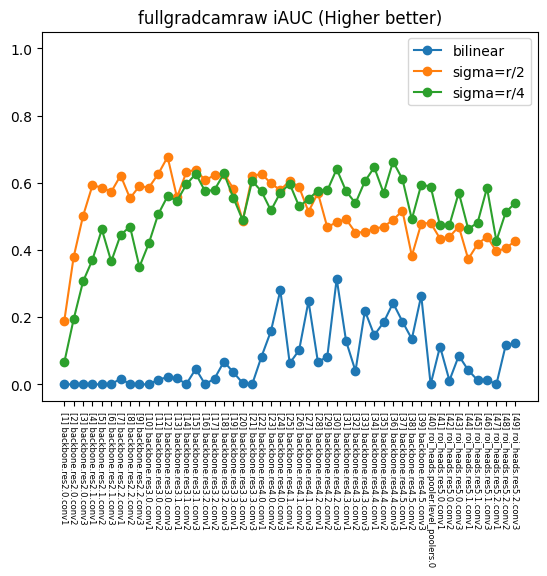

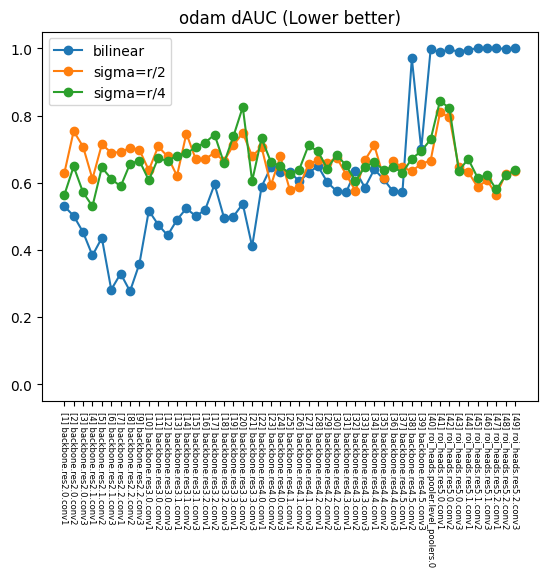

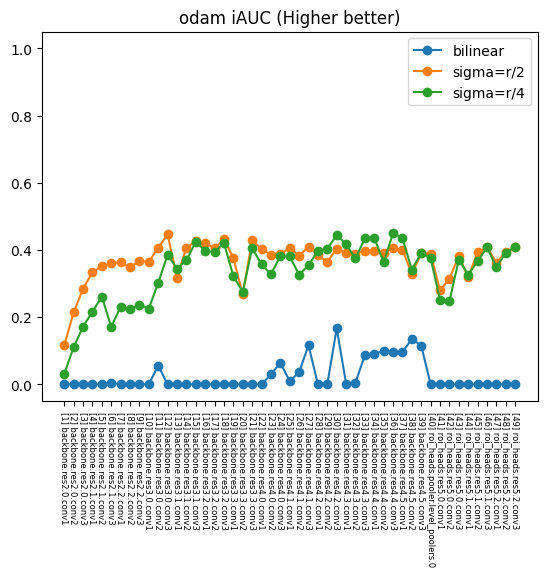

In [35]:
color_codes = {
    'bilinear' : "tab:blue",
    2 : "tab:orange",
    4 : "tab:green",
}

for xai_method in xai_methods:

    plt.figure()
    for sigma_factor in sigma_factors:
        legend = sigma_factor
        if sigma_factor != 'bilinear':
            legend = f"sigma=r/{sigma_factor}"
        plt.plot(range(len(layers)), dAUC[xai_method][sigma_factor].values(),color=color_codes[sigma_factor],marker='o',label=legend)
    plt.xticks(range(len(layers)), [f"[{i+1}] {name}" for i, name in enumerate(dAUC[xai_method][sigma_factor].keys())],rotation=-90, fontsize=6)
    plt.title(f'{xai_method} dAUC (Lower better)')
    plt.ylim([-0.05,1.05])
    plt.legend()
    plt.show()

    plt.figure()
    for sigma_factor in sigma_factors:
        legend = sigma_factor
        if sigma_factor != 'bilinear':
            legend = f"sigma=r/{sigma_factor}"
        plt.plot(range(len(layers)), iAUC[xai_method][sigma_factor].values(),color=color_codes[sigma_factor],marker='o',label=legend)
    plt.xticks(range(len(layers)), [f"[{i+1}] {name}" for i, name in enumerate(iAUC[xai_method][sigma_factor].keys())],rotation=-90, fontsize=6)
    plt.title(f'{xai_method} iAUC (Higher better)')
    plt.ylim([-0.05,1.05])
    plt.legend()
    plt.show()

## Valid Area = All Salient Regions (>1e-2)
normalized by the first step (confidence on the intact image)

In [39]:
sigma_factors = ['bilinear',2,4]
xai_methods = ['fullgradcamraw']

dAUC = {}
iAUC = {}

for xai_method in xai_methods:

    dAUC[xai_method] = defaultdict(defaultdict)
    iAUC[xai_method] = defaultdict(defaultdict)

    for sigma_factor in sigma_factors:
        if sigma_factor == 'bilinear':
            root = f"/mnt/h/jinhan/results/mscoco/unrestricted_valid_area/xai_saliency_maps_faster_{sigma_factor}/{xai_method}"
        else:
            root = f"/mnt/h/jinhan/results/mscoco/unrestricted_valid_area/xai_saliency_maps_faster_gaussian_sigma{sigma_factor}/{xai_method}"

        for layer in layers:
            path = os.path.join(root,f"{layer}.mat")
            mat = scipy.io.loadmat(path)
            intact_score = mat['meanConf_deletionAI'][0,:]
            dAUC[xai_method][sigma_factor][layer] = (mat['meanConf_deletionAI'].mean(axis=0) / intact_score).mean()
            iAUC[xai_method][sigma_factor][layer] = (mat['meanConf_insertationAI'].mean(axis=0)  / intact_score).mean()

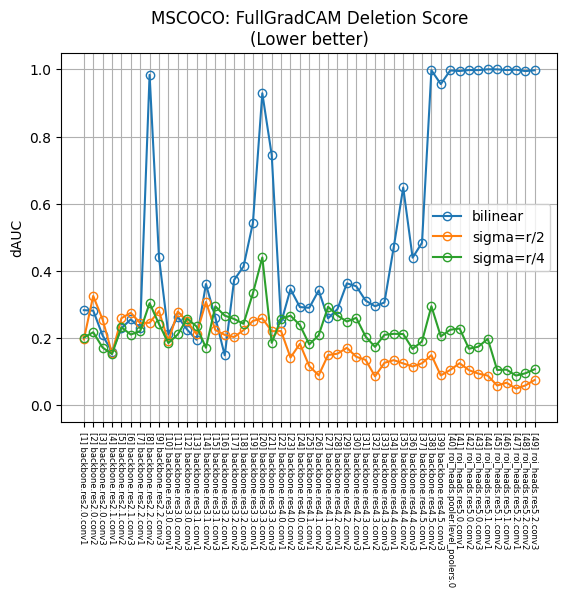

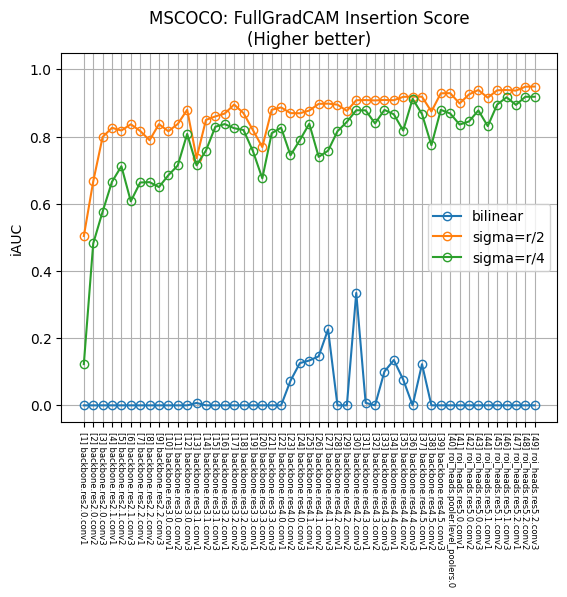

In [42]:
color_codes = {
    'bilinear' : "tab:blue",
    2 : "tab:orange",
    4 : "tab:green",
}

for xai_method in xai_methods:

    plt.figure()
    plt.grid()
    for sigma_factor in sigma_factors:
        legend = sigma_factor
        if sigma_factor != 'bilinear':
            legend = f"sigma=r/{sigma_factor}"
        plt.plot(range(len(layers)), dAUC[xai_method][sigma_factor].values(),color=color_codes[sigma_factor],marker='o',fillstyle='none',label=legend)
    plt.xticks(range(len(layers)), [f"[{i+1}] {name}" for i, name in enumerate(dAUC[xai_method][sigma_factor].keys())],rotation=-90, fontsize=6)
    plt.title(f"MSCOCO: {xai_method.replace('fullgradcamraw','FullGradCAM')} Deletion Score\n(Lower better)")
    plt.ylim([-0.05,1.05])
    plt.ylabel("dAUC")
    plt.legend()
    plt.show()

    plt.figure()
    plt.grid()
    for sigma_factor in sigma_factors:
        legend = sigma_factor
        if sigma_factor != 'bilinear':
            legend = f"sigma=r/{sigma_factor}"
        plt.plot(range(len(layers)), iAUC[xai_method][sigma_factor].values(),color=color_codes[sigma_factor],marker='o',fillstyle='none',label=legend)
    plt.xticks(range(len(layers)), [f"[{i+1}] {name}" for i, name in enumerate(iAUC[xai_method][sigma_factor].keys())],rotation=-90, fontsize=6)
    plt.title(f"MSCOCO: {xai_method.replace('fullgradcamraw','FullGradCAM')} Insertion Score\n(Higher better)")
    plt.ylim([-0.05,1.05])
    plt.ylabel("iAUC")
    plt.legend()
    plt.show()

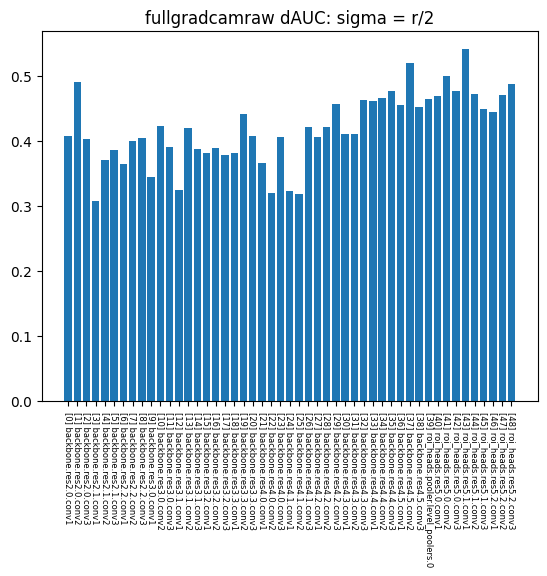

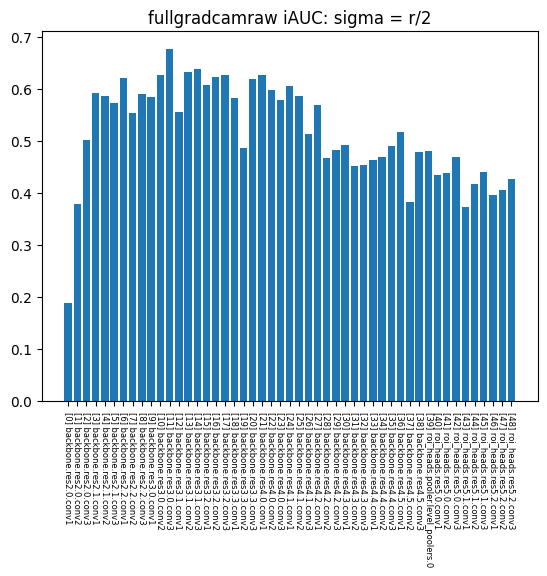

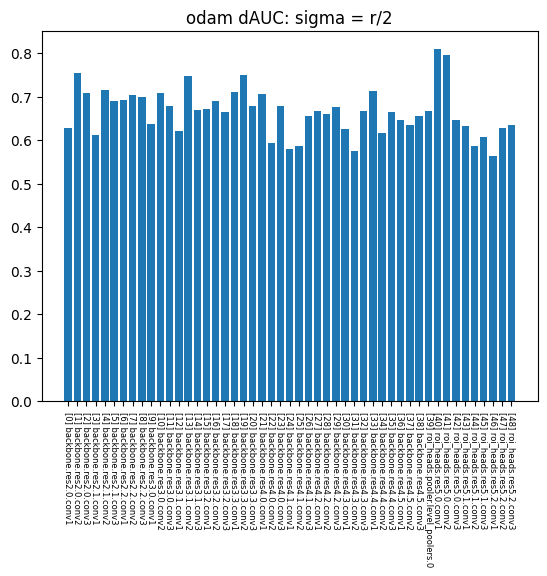

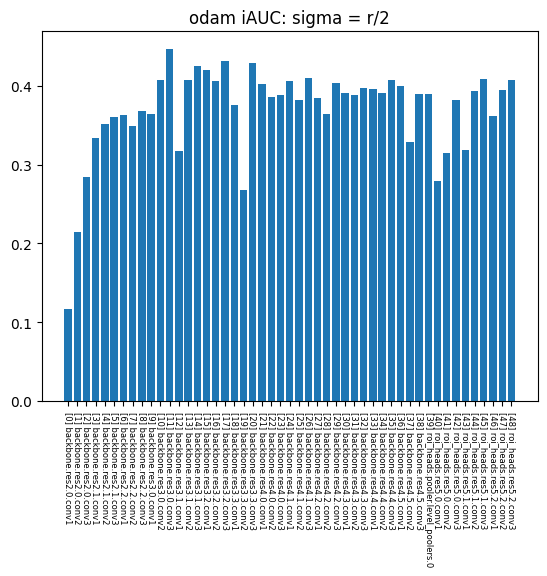

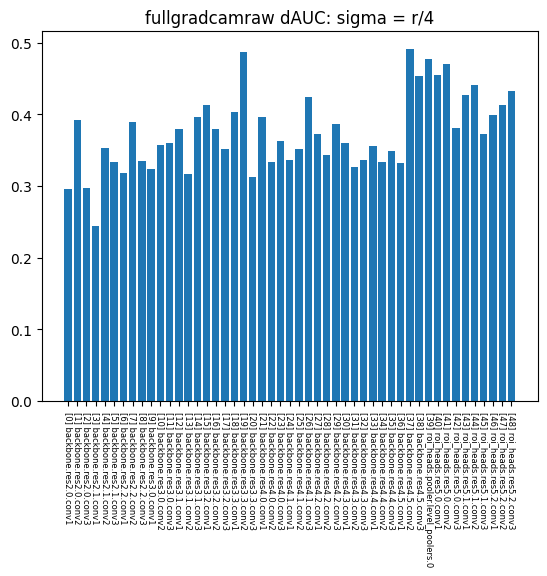

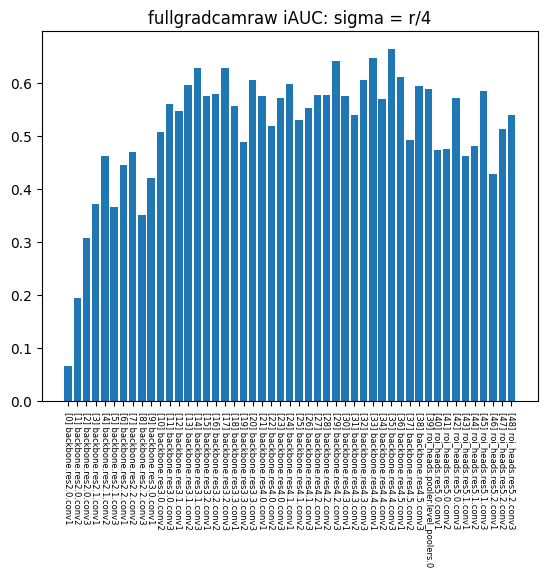

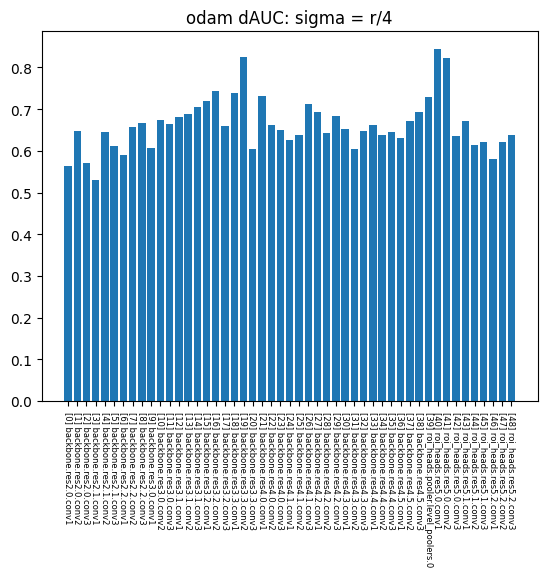

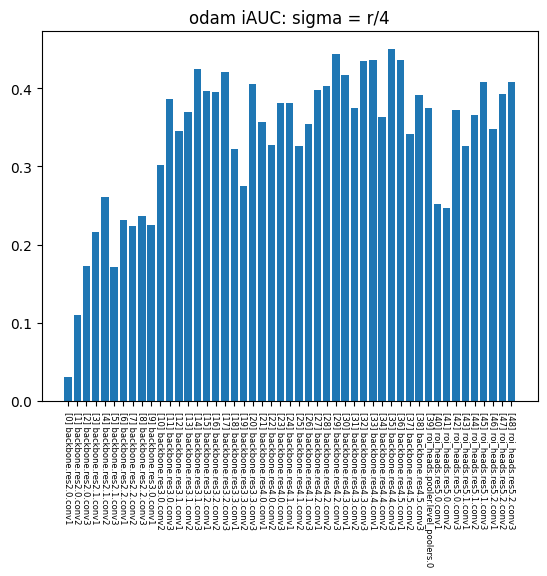

In [27]:
sigma_factors = [2,4]
xai_methods = ['fullgradcamraw','odam']

for sigma_factor in sigma_factors:
    for xai_method in xai_methods:
        root = f"/mnt/h/jinhan/results/mscoco/xai_saliency_maps_faster_gaussian_sigma{sigma_factor}/{xai_method}"

        dAUC = dict()
        iAUC = dict()

        for layer in layers:
            path = os.path.join(root,f"{layer}.mat")
            mat = scipy.io.loadmat(path)
            intact_score = mat['meanConf_deletionAI'][0,:]
            dAUC[layer] = (mat['meanConf_deletionAI'].mean(axis=0) / intact_score).mean()
            iAUC[layer] = (mat['meanConf_insertationAI'].mean(axis=0)  / intact_score).mean()

        plt.figure()
        plt.bar(range(1,len(layers)+1), dAUC.values())
        plt.xticks(range(1,len(layers)+1), [f"[{i}] {name}" for i, name in enumerate(dAUC.keys())],rotation=-90, fontsize=6)
        plt.title(f'{xai_method} dAUC: sigma = r/{sigma_factor}')
        plt.show()

        plt.figure()
        plt.bar(range(1,len(layers)+1), iAUC.values())
        plt.xticks(range(1,len(layers)+1), [f"[{i}] {name}" for i, name in enumerate(iAUC.keys())],rotation=-90, fontsize=6)
        plt.title(f'{xai_method} iAUC: sigma = r/{sigma_factor}')
        plt.show()

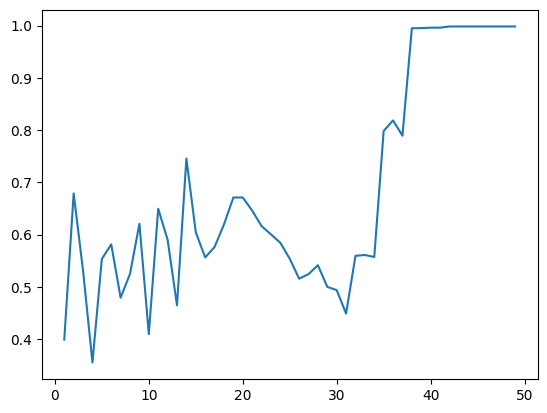

In [13]:
plt.plot(range(1,len(layers)+1), dAUC.values())

In [ ]:
for ratio, path in path_dict.items():
    mat = scipy.io.loadmat(path)
    deletion_res = mat['meanConf_deletionAI']
    insertion_res = mat['meanConf_insertationAI']
    all_imgs = mat['allDir']['name']

    imgs_name_idx_map = {
            523:0,
            536:0,
            1356:0,
            1477:0,
            3458:0
            }
    for i, name in enumerate(all_imgs):
        for img in imgs_name_idx_map.keys():
            if str(img) in name.item().item(): 
                imgs_name_idx_map[img] = i

    for img, idx in imgs_name_idx_map.items():
        deletion_AUC = deletion_res[:,idx]
        insertion_AUC = insertion_res[:,idx]

        plt.plot(range(100),deletion_AUC)
        plt.fill_between(range(100),deletion_AUC)
        plt.title(f"threshold={ratio}% img={img} dAUC={deletion_AUC.mean():.2f}")
        plt.show()

        plt.plot(range(100),insertion_AUC)
        plt.fill_between(range(100),insertion_AUC)
        plt.title(f"threshold={ratio}% img={img} iAUC={insertion_AUC.mean():.2f}")
        plt.show()

In [8]:
imgs_name_idx_map

{523: 7, 536: 8, 1356: 18, 1477: 20, 3458: 0}

# Threshold-Based (Valid area = GT BB Size)

In [11]:
images_focused = ["0006",
"0303",
"0386",
"0523",
"0536",
"1115",
"1356",
"1477",
"1645",
"1792",
"1855",
"1940",
"2061",
"2080",
"2104",
"2750",
"2798",
"2930",
"3016",
"3181",
"3214",
"3375",
"3420",
"3458",
"3515",
"3642",
"3831",
"3959",
"4362",
"4679",]

focused_layers = defaultdict(list)

In [12]:
root_dir = "/mnt/h/OneDrive - The University Of Hong Kong/counterfactual/Stimuli_Images_Forward_Results/threshold_black"
dAUC = {}
iAUC = {}

count_zero_dAUC = defaultdict(int)
count_zero_iAUC = defaultdict(int)

for layer in range(1,18):
    # print(layer)
    path = os.path.join(root_dir,f'F{layer}_AI_forward_saliency_map_full_mat_faithfulness_rawConf_update1.mat')

    mat = scipy.io.loadmat(path)
    deletion_res = mat['meanConf_deletionAI']
    insertion_res = mat['meanConf_insertationAI']
    all_imgs = mat['allDir']['name']

    deletion_no_detection = mat['no_detection_deletionAI']
    insertion_no_detection = mat['no_detection_insertionAI']

    img_counts = deletion_res.shape[1]

    dauc_error = 0
    iauc_error = 0

    for i in range(img_counts):
        deletion_AUC = deletion_res[:,i].mean()
        if deletion_AUC == 0:
            # if '523' in all_imgs[i][0].item():
            #     print(layer,"\t","deletion")
            count_zero_dAUC[layer] += 1/img_counts
            if not deletion_no_detection[i].item():
                count_zero_dAUC[layer] -= 1/img_counts
                dauc_error += 1
                # print("deletion\t",all_imgs[i][0].item())
        insertion_AUC = insertion_res[:,i].mean()
        if insertion_AUC == 0: 
            # print(f"{layer} insertion\t",all_imgs[i][0].item())
            # if '523' in all_imgs[i][0].item():
            #     print(layer,"\t","insertion")

            for img in images_focused:
                if img in all_imgs[i][0].item():
                    focused_layers[img].append(layer)

            count_zero_iAUC[layer] += 1/img_counts
            if not insertion_no_detection[i].item():
                count_zero_iAUC[layer] -= 1/img_counts
                iauc_error += 1
                # print("insertion\t",all_imgs[i][0].item())
    # print(dauc_error,"\t",iauc_error)
                    
    dAUC[layer] = deletion_res.mean()
    iAUC[layer] = insertion_res.mean()

In [13]:
focused_layers

defaultdict(list,
            {'0303': [1,
              2,
              3,
              4,
              5,
              6,
              7,
              8,
              9,
              10,
              11,
              12,
              13,
              14,
              15,
              16,
              17],
             '0386': [1, 5, 6, 7, 8, 9, 10, 11, 13, 15, 16],
             '0523': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17],
             '0536': [1,
              2,
              3,
              4,
              5,
              6,
              7,
              8,
              9,
              10,
              11,
              12,
              13,
              14,
              15,
              16,
              17],
             '1115': [1, 9, 10, 11, 12, 13, 15, 16, 17],
             '1356': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17],
             '1645': [1,
              2,
              3,
              4,
              5,
       

In [16]:
focused_layers.keys()

dict_keys(['0303', '0386', '0523', '0536', '1115', '1356', '1645', '1855', '1940', '2061', '2104', '2750', '2798', '2930', '3016', '3181', '3458', '3515', '3642', '3831', '4362', '4679', '1477', '2080', '3375', '0006', '3214', '1792', '3420', '3959'])

/tmp/ipykernel_300422/3844467227.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
/tmp/ipykernel_300422/3844467227.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


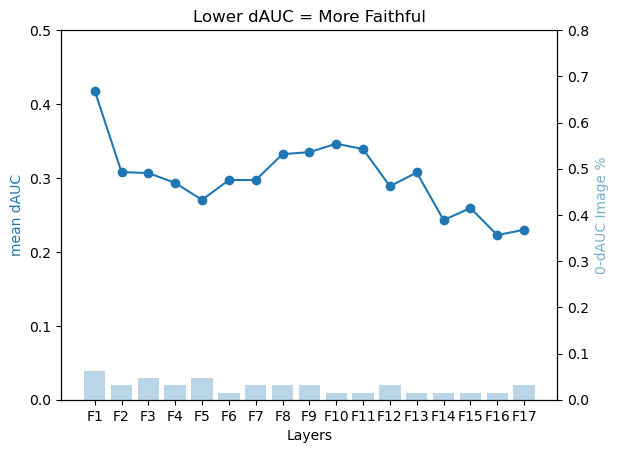

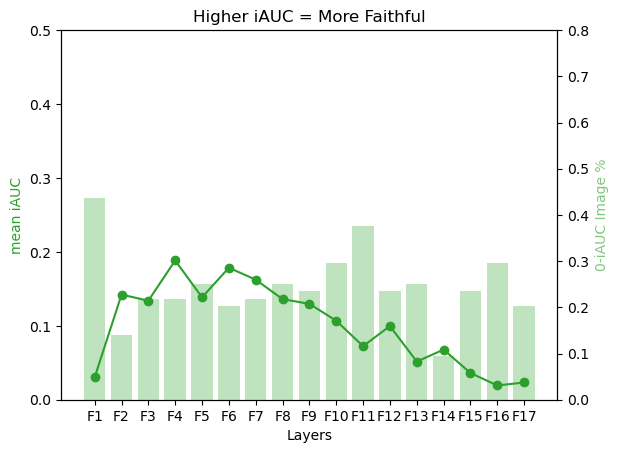

In [11]:
fig1, ax11 = plt.subplots()
ax12 = ax11.twinx()

ax11.plot(range(17),dAUC.values(),color='tab:blue',marker='o',label='mean dAUC')
ax12.bar(range(17),count_zero_dAUC.values(),color='tab:blue',alpha=0.3,label='0-dAUC Image %')

ax11.set_xlabel('Layers')
ax11.set_xticks(range(17))
ax11.set_xticklabels([f'F{i+1}' for i in range(17)])
ax11.set_ylabel(color='tab:blue',ylabel='mean dAUC')
ax12.set_ylabel(color='tab:blue',ylabel='0-dAUC Image %',alpha=0.6)
ax11.set_ylim(0,0.5)
ax12.set_ylim(0,0.8)

ax11.set_title(f"Lower dAUC = More Faithful")
fig1.show()

# insertion

fig2, ax21 = plt.subplots()
ax22 = ax21.twinx()

ax21.plot(range(17),iAUC.values(),color='tab:green',marker='o',label='mean iAUC')
ax22.bar(range(17),count_zero_iAUC.values(),color='tab:green',alpha=0.3,label='0-iAUC Image %')

ax21.set_xlabel('Layers')
ax21.set_xticks(range(17))
ax21.set_xticklabels([f'F{i+1}' for i in range(17)])
ax21.set_ylabel(color='tab:green',ylabel='mean iAUC')
ax22.set_ylabel(color='tab:green',ylabel='0-iAUC Image %',alpha=0.6)
ax21.set_ylim(0,0.5)
ax22.set_ylim(0,0.8)

ax21.set_title(f"Higher iAUC = More Faithful")
fig2.show()

# plt.plot(range(17),dAUC.values(),color='tab:blue',label='mean dAUC')
# plt.bar(range(17),count_zero_dAUC.values(),color='tab:blue',label='0-dAUC Image %',alpha=0.3)
# plt.title(f"Lower dAUC = More Faithful")
# plt.xticks(range(17),[f'F{i+1}' for i in range(17)])
# plt.legend()
# plt.show()

# plt.plot(range(17),iAUC.values(),color='tab:green',label='mean iAUC')
# plt.bar(range(17),count_zero_iAUC.values(),color='tab:green',label='0-iAUC Image %',alpha=0.3)
# plt.title(f"Higher iAUC = More Faithful")
# plt.xticks(range(17),[f'F{i+1}' for i in range(17)])
# plt.legend()
# plt.show()

# Compare align_corner

In [22]:
before_root_dir = "/mnt/h/OneDrive - The University Of Hong Kong/counterfactual/Stimuli_Images_Forward_Results/threshold_black"
after_root_dir = "/mnt/h/jinhan/counterfactual/results/Stimuli_Images_Forward_Results_align_corner"
dAUC = defaultdict(defaultdict)
iAUC = defaultdict(defaultdict)

dAUC_zero_imgs = []
iAUC_zero_imgs = []

for cond, root_dir in zip(['before','after'],[before_root_dir, after_root_dir]):
    layer = 10
    # print(layer)
    path = os.path.join(root_dir,f'F{layer}_AI_forward_saliency_map_full_mat_faithfulness_rawConf_update1.mat')

    mat = scipy.io.loadmat(path)
    deletion_res = mat['meanConf_deletionAI']
    insertion_res = mat['meanConf_insertationAI']
    all_imgs = mat['allDir']['name']

    img_counts = deletion_res.shape[1]

    for i in range(img_counts):
        img = all_imgs[i][0].item()

        dAUC[cond][img] = deletion_res[:,i].mean()
        iAUC[cond][img] = insertion_res[:,i].mean()

        if cond == 'before':
            if dAUC[cond][img] == 0: dAUC_zero_imgs += [img]
            if iAUC[cond][img] == 0: iAUC_zero_imgs += [img]

In [25]:
dAUC_diff = {}
iAUC_diff = {}

for img in dAUC['before'].keys():
    dAUC_diff[img] = dAUC['after'][img] - dAUC['before'][img]
    iAUC_diff[img] = iAUC['after'][img] - iAUC['before'][img]

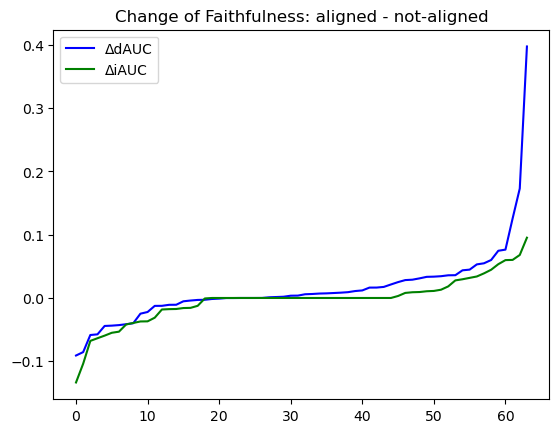

In [45]:
plt.plot(range(len(all_imgs)),sorted(dAUC_diff.values()),color='tab:blue',label='ΔdAUC')
plt.plot(range(len(all_imgs)),sorted(iAUC_diff.values()),color='tab:green',label='ΔiAUC')
plt.legend()
plt.title('Change of Faithfulness: aligned - not-aligned')
plt.show()

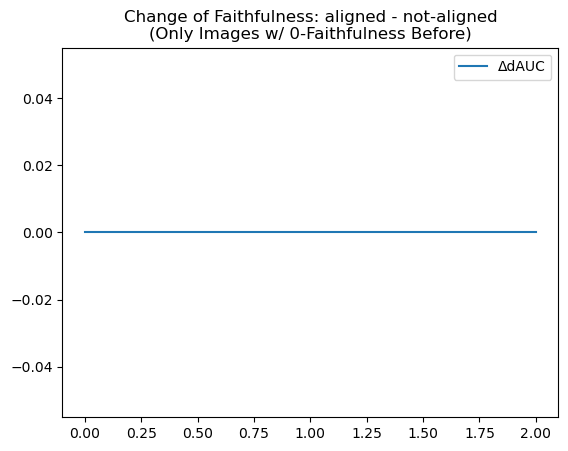

In [39]:
dAUC_zero_focused = [v for k,v in dAUC_diff.items() if k in dAUC_zero_imgs]
plt.plot(range(len(dAUC_zero_focused)),sorted(dAUC_zero_focused),color='tab:blue',label='ΔdAUC')
# plt.plot(range(len(all_imgs)),sorted(iAUC_diff.values()),color='tab:green',label='ΔiAUC')
plt.legend()
plt.title('Change of Faithfulness: aligned - not-aligned\n(Only Images w/ 0-Faithfulness Before)')
plt.show()

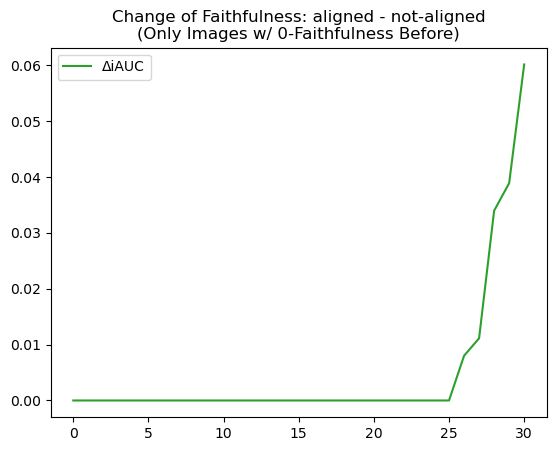

In [36]:
iAUC_zero_focused = [v for k,v in iAUC_diff.items() if k in iAUC_zero_imgs]
plt.plot(range(len(iAUC_zero_focused)),sorted(iAUC_zero_focused),color='tab:green',label='ΔiAUC')
# plt.plot(range(len(all_imgs)),sorted(iAUC_diff.values()),color='tab:green',label='ΔiAUC')
plt.legend()
plt.title('Change of Faithfulness: aligned - not-aligned\n(Only Images w/ 0-Faithfulness Before)')
plt.show()

In [41]:
[(k,v) for k,v in iAUC_diff.items() if k in iAUC_zero_imgs and v != 0]

[('0006-res.jpg.mat', 0.06015000000000001),
 ('1115-res.jpg.mat', 0.0389),
 ('1792-res.jpg.mat', 0.033966666666666666),
 ('3420-res.jpg.mat', 0.011133333333333334),
 ('4762-res.jpg.mat', 0.008)]

In [42]:
[(k,v) for k,v in dAUC_diff.items() if v > 0.1]

[('2930-res.jpg.mat', 0.12560000000000004),
 ('3016-res.jpg.mat', 0.39735),
 ('3511-res.jpg.mat', 0.1729500000000001)]